<a href="https://colab.research.google.com/github/RahulNinawe05/colab/blob/main/langsmith.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chatbot With Langgraph

In [21]:
! pip install langgraph langsmith

In [22]:
! pip install langchain langchain_groq langchain_community

In [23]:
from google.colab import userdata
groq_api_key = userdata.get("GROQ_API_KEY")
langsmith = userdata.get("LANGSMITH_API_KEY")

In [24]:
import os
os.environ["LANGCHAIN_API_KEY"]= langsmith
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"] ="LANGSMITH_COLAB"

In [25]:
from langchain_groq import ChatGroq

In [26]:
llm = ChatGroq(groq_api_key=groq_api_key,model_name="llama-3.1-8b-instant")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x78b952103080>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x78b951f50950>, model_name='llama-3.1-8b-instant', model_kwargs={}, groq_api_key=SecretStr('**********'))

# Start building a chatbot Using Langgraph

In [27]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [28]:
class State(TypedDict):
  #It creates a dictionary type called State which must have a key "messages".
  # That key holds a list, and the add_messages part tells the framework how to
  # handle/update that list (extra rule/metadata).
  messages:Annotated[list,add_messages]
graph_builder=StateGraph(State)


In [29]:
graph_builder

In [30]:
def chatbot(state:State):
  return {'messages':llm.invoke(state['messages'])}

In [31]:
graph_builder.add_node("chatbot",chatbot)

In [32]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [33]:
graph=graph_builder.compile()

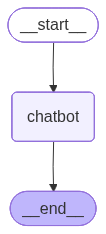

In [35]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass
